# Statistical Tests

### Leonardo Alchieri, Università della Svizzera Italiana

#### 10 Nov 2025, Istituto Nazionale dei Tumori, Milano

## Example Description

We're going to use the same data as the previous example. We're focusing on applying statistical tests.

# Necessary Packages

## You need to install the following packages

- `pandas`
- `seaborn`
- `scipy`
- `statannotations`

`scipy` is a package aimed at "scientific computing" and includes modules for statistics, optimization, integration, linear algebra, and more.

It contains many statistical tests that are commonly used in data analysis, including t-tests, ANOVA, chi-square tests, and non-parametric tests.

# Simple tests

In [1]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./data/clinical-example-1.xlsx')
display(data.head())

,ID,ARM,TimePoint,Risposta,Basophils,Neutrophils
0,1,High Dose,T1,Responder,12018.795950,11347.932198
1,1,High Dose,T2,Responder,30001.500000,12000.600000
2,1,High Dose,T3,Responder,18000.900000,45002.250000
3,1,High Dose,T4,Responder,24001.200000,24001.200000
4,1,High Dose,T5,Responder,44291.937567,74879.138932


### Test between responders and non-responders, at Timepoint 5, for Basophils, for ARM "High Dose"

In [3]:
group1 = data[
    (data["ARM"] == "High Dose")
    & (data["Risposta"] == "Responder")
    & (data["TimePoint"] == "T5")
]["Basophils"]

group2 = data[
    (data["ARM"] == "High Dose")
    & (data["Risposta"] == "Non-Responder")
    & (data["TimePoint"] == "T5")
]["Basophils"]

Since we have two independent groups, the most appropriate test is the independent samples t-test.

In [4]:
t_statistics, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistics: {t_statistics}, P-value: {p_value}")

T-statistics: 10.542569822389334, P-value: 1.4861234587918641e-12


A better formatting

In [5]:
print(f"T-statistics: %.2f, P-value: %.1E" % (t_statistics, p_value))

T-statistics: 10.54, P-value: 1.5E-12


### Test between responders, for "High Dose", between timepoint 1 and 5

In this case, we are comparing the same group at different times. We use a paired samples t-test.

In [6]:
before = data[
    (data["ARM"] == "High Dose")
    & (data["Risposta"] == "Responder")
    & (data["TimePoint"] == "T1")
]["Basophils"]

after = data[
    (data["ARM"] == "High Dose")
    & (data["Risposta"] == "Responder")
    & (data["TimePoint"] == "T5")
]["Basophils"]

In [7]:
t_statistics, p_value = stats.ttest_rel(before, after)
print(f"T-statistics: %.2f, P-value: %.1E" % (t_statistics, p_value))

T-statistics: -10.48, P-value: 4.3E-09


### Test between responders, for "High Dose", at Timepoint 1 with the "population average"

In [8]:
sample = data[
    (data["ARM"] == "High Dose")
    & (data["Risposta"] == "Responder")
    & (data["TimePoint"] == "T0")
]["Basophils"]

population_mean = 17000

In this case, we need to use the one-sample t-test.

In [9]:
t_statistics, p_value = stats.ttest_rel(before, after)
print(f"T-statistics: %.2f, P-value: %.1E" % (t_statistics, p_value))

T-statistics: -10.48, P-value: 4.3E-09


**IMPORTANT**: Remember to check the assumptions of the tests before applying them! T-test assumptions include normality of the data and homogeneity of variances. If these assumptions are violated, consider using non-parametric alternatives such as the Mann-Whitney U test or the Wilcoxon signed-rank test.

```python
# Mann-Whitney U test (non-parametric alternative to t-test)
stats.mannwhitneyu(group1, group2)

# Wilcoxon signed-rank test (non-parametric paired test)
stats.wilcoxon(before, after)
```


### ANOVA

We now compare more than two groups. For example, we want to compare Basophils at Timepoint 5 between the three arms: "Placebo", "Low Dose", and "High Dose".

In [10]:
group1 = data[
    (data["ARM"] == "High Dose")
    & (data["Risposta"] == "Responder")
    & (data["TimePoint"] == "T5")
]["Basophils"]

group2 = data[
    (data["ARM"] == "Low Dose")
    & (data["Risposta"] == "Responder")
    & (data["TimePoint"] == "T5")
]["Basophils"]

group3 = data[
    (data["ARM"] == "Placebo")
    & (data["Risposta"] == "Responder")
    & (data["TimePoint"] == "T5")
]["Basophils"]

In [11]:
t_statistics, p_value = stats.f_oneway(group1, group2, group3)
print(f"F-statistics: %.2f, P-value: %.1E" % (t_statistics, p_value))

F-statistics: 19.02, P-value: 1.0E-06


## Additional libraries

- `statsmodels`: for advanced statistical modeling and hypothesis testing.
- `scikit-posthocs`: for post-hoc analysis following ANOVA. For example, Tukey's HSD test.
- `pingouin`: for a wide range of statistical tests and effect size calculations.

## Visualize statistical tests

***WARNING***: Limited support for statistical test visualization in python.

In [12]:
from statannotations.Annotator import Annotator

In [13]:
data_subset = data[
    (data["ARM"] == "High Dose")
]
display(data_subset.head())

,ID,ARM,TimePoint,Risposta,Basophils,Neutrophils
0,1,High Dose,T1,Responder,12018.795950,11347.932198
1,1,High Dose,T2,Responder,30001.500000,12000.600000
2,1,High Dose,T3,Responder,18000.900000,45002.250000
3,1,High Dose,T4,Responder,24001.200000,24001.200000
4,1,High Dose,T5,Responder,44291.937567,74879.138932


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

T1_Responder vs. T1_Non-Responder: t-test independent samples, P_val:9.084e-02 t=-1.738e+00
T5_Responder vs. T5_Non-Responder: t-test independent samples, P_val:1.486e-12 t=1.054e+01
T1_Responder vs. T5_Responder: t-test independent samples, P_val:5.201e-13 t=-1.095e+01


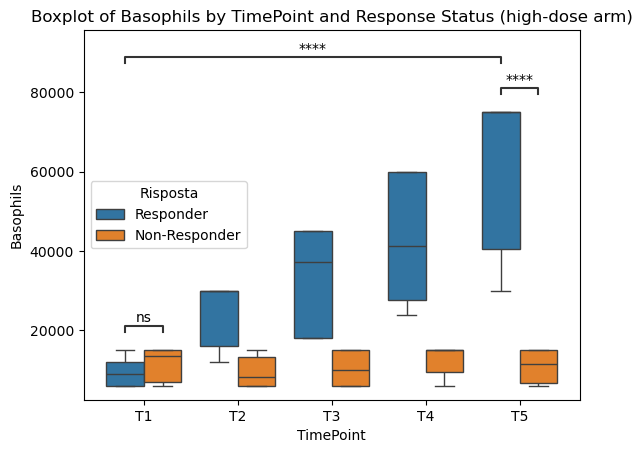

In [14]:
x = "TimePoint"
y = "Basophils"
hue = "Risposta"

# IMPORTANT: does not work with sns.catplot, only with sns.boxplot, sns.violinplot, sns.swarmplot, sns.stripplot, sns.barplot
ax = sns.boxplot(
    data=data_subset,y=y,x=x,hue=hue,
)

# When using hue, pairs need to include both x and hue values
pairs = [
    (("T1", "Responder"), ("T1", "Non-Responder")),
    (("T5", "Responder"), ("T5", "Non-Responder")),
    (("T1", "Responder"), ("T5", "Responder")),
]

annotator = Annotator(ax, pairs, data=data_subset, 
                      x=x, y=y, hue=hue)
# available tests: t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal, Brunner-Munzel.
# available text formats: 'full', 'simple', 'star'
annotator.configure(test="t-test_ind", 
                    text_format="star",
                    loc="inside")
annotator.apply_and_annotate()

plt.title("Boxplot of Basophils by TimePoint and Response Status (high-dose arm)")
plt.savefig("data/boxplot-basophils-timepoint-response-highdose.png", bbox_inches="tight")
plt.show()

![result](/Users/leonardoalchieri/Desktop/GIT-Mine/Python-Lecture-Ele/data/boxplot-basophils-timepoint-response-highdose.png)

# Your turn!

Try to answer the following questions, using statistical tests and/or visualizations:
- Are there significant differences in Basophils between responders and non-responders at Timepoint 3, for the "Low Dose" arm?
- Are there significant differences in Basophils for responders, between Timepoint 1 and Timepoint 5, for the "High Dose" arm?
- Is there a correlation between Basophils and Neutrophils at Timepoint 5, for the "Placebo" arm?

**Help**: 

- Do to correlation, you can use `scipy.stats.pearsonr` or `scipy.stats.spearmanr` depending on the data distribution.
- I also suggest to try to perform effect size analysis, using for example `pingouin` package.
```python
import pingouin as pg
# Example: calculating Cohen's d for two independent groups
cohen_d = pg.compute_effsize(data1, data2, eftype='cohen_d')
```
